testing out in-progress branch https://github.com/chrishavlin/yt/tree/cutting_spheres (and cuting_spheres_pixelizer_temp)

In [1]:
import numpy as np

import yt
from yt.testing import fake_amr_ds
import matplotlib.pyplot as plt 

ds = fake_amr_ds(geometry="spherical")
normal = np.array([0.0, 0.0, 1.0])
plane_center = np.array([0.0, 0.0, 0.5])
slc = ds.cutting_mixed(normal, plane_center)

yt : [INFO     ] 2024-02-22 12:25:26,317 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-02-22 12:25:26,318 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-02-22 12:25:26,318 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-22 12:25:26,318 Parameters: domain_right_edge         = [1.         3.14159265 6.28318531]
yt : [INFO     ] 2024-02-22 12:25:26,319 Parameters: cosmological_simulation   = 0


In [2]:
%%time
frb = slc.to_frb(2.0, (100,200))
bvals = frb[("index", "r")]

yt : [INFO     ] 2024-02-22 12:25:26,329 Making a fixed resolution buffer of (('index', 'r')) 100 by 200


CPU times: user 54.3 ms, sys: 5.55 ms, total: 59.8 ms
Wall time: 59 ms


In [3]:
frb.bounds

(-1.0, 1.0, -1.0, 1.0)

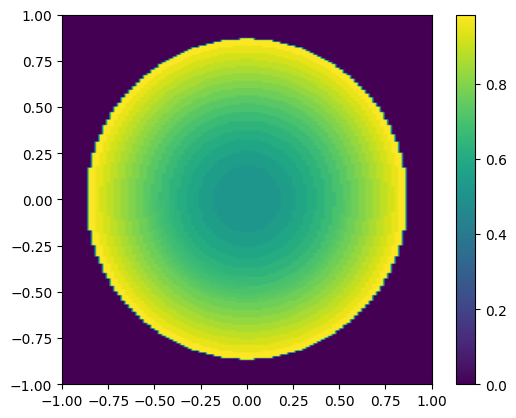

In [4]:
plt.imshow(bvals, origin='lower', extent=frb.bounds)
plt.colorbar()

The above slice is parallel to xy and passes through z=0.5, so values go from 0.5 to 1!

In [5]:
ds = yt.load_sample("KeplerianDisk")
normal = np.array([0.0, 1.0, 0.0])
plane_center = np.array([0.0, 0.0, 0.0])
slc = ds.cutting_mixed(normal, plane_center)

yt : [INFO     ] 2024-02-22 12:25:27,023 Sample dataset found in '/Users/chavlin/data/yt_data/KeplerianDisk/disk.out1.00000.athdf'
yt : [WARNING  ] 2024-02-22 12:25:27,914 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2024-02-22 12:25:27,915 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2024-02-22 12:25:27,915 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2024-02-22 12:25:27,915 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-02-22 12:25:27,946 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-02-22 12:25:27,947 Parameters: domain_dimensions         = [256  64   4]
yt : [INFO     ] 2024-02-22 12:25:27,947 Parameters: domain_left_edge          = [0.3        1.17809725 0.        ]
yt : [INFO     ] 2024-02-22 12:25:27,947 Parameters: domain_right_edge         = [3.         1.96349541 6.28318531]
yt : [INFO     ] 2024-02-22 12:25:27,947 Parameters: cosmological_simulation   = 0


In [6]:
%%time
frb = slc.to_frb(8.0, 800, height=6.0)
bvals = frb[("athena_pp", "dens")]

yt : [INFO     ] 2024-02-22 12:25:27,951 Making a fixed resolution buffer of (('athena_pp', 'dens')) 800 by 800


CPU times: user 5.5 s, sys: 36.7 ms, total: 5.54 s
Wall time: 5.54 s


In [7]:
%%time
mask = frb.get_mask(("athena_pp", "dens"))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 4.05 µs


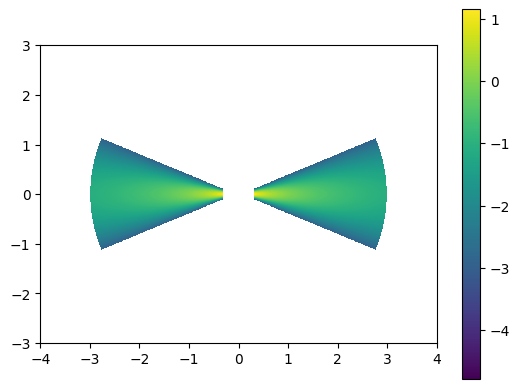

In [8]:
bvals[~mask] = np.nan
plt.imshow(np.log10(bvals), extent=frb.bounds, origin='lower')
plt.colorbar()

for reference, here's what a slize in the x-z plane at x>0 looks like (where phi==0)

yt : [INFO     ] 2024-02-22 12:25:33,648 xlim = 0.277164 3.000000
yt : [INFO     ] 2024-02-22 12:25:33,649 ylim = -1.148050 1.148050
yt : [INFO     ] 2024-02-22 12:25:33,649 Setting origin='native' for spherical geometry.
yt : [INFO     ] 2024-02-22 12:25:33,651 xlim = 0.277164 3.000000
yt : [INFO     ] 2024-02-22 12:25:33,651 ylim = -1.148050 1.148050
yt : [INFO     ] 2024-02-22 12:25:33,651 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



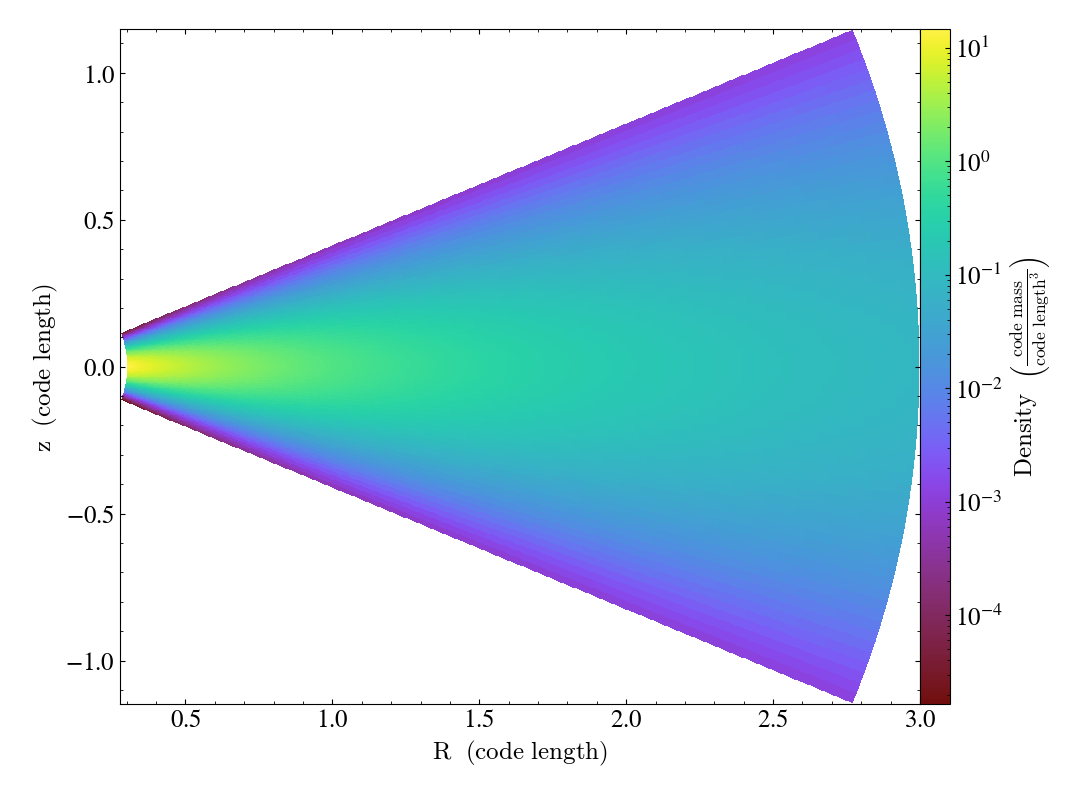

In [9]:
c = ds.domain_center.copy()
c[2] = 0.0
yt.SlicePlot(ds, 'phi', 'density', center=c)

yt : [INFO     ] 2024-02-22 12:25:34,361 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-02-22 12:25:34,361 Parameters: domain_dimensions         = [100  80 110]
yt : [INFO     ] 2024-02-22 12:25:34,362 Parameters: domain_left_edge          = [3480.    0.    0.]
yt : [INFO     ] 2024-02-22 12:25:34,362 Parameters: domain_right_edge         = [6.37000000e+03 3.14159265e+00 6.28318531e+00]
yt : [INFO     ] 2024-02-22 12:25:34,362 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-02-22 12:25:34,363 Making a fixed resolution buffer of (('stream', 'dens')) 500 by 500


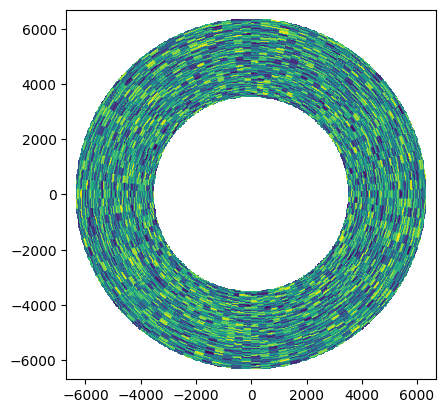

In [10]:
import yt 
import matplotlib.pyplot as plt 
import numpy as np

r_max = 6370. # earth's surface
r_min = 3480. # core-mantle boundary

bbox = np.array([[r_min, r_max], 
                 [0, np.pi], 
                 [0, 2*np.pi]])

data_shp = (100, 80, 110)
data = {'dens': np.random.random(data_shp)}
ds = yt.load_uniform_grid(data, 
                          data_shp, 
                          bbox=bbox, 
                          geometry='spherical', 
                          length_unit='km')

normal = np.array([0., 0., 1.0])
plane_center = np.array([0.0, 0.0, 0.0])
slc = ds.cutting_mixed(normal, plane_center)
frb = slc.to_frb(6370*2.1, (500,500))
bvals = frb[("stream", "dens")]
mask = frb.get_mask(("stream", "dens"))
bvals[~mask] = np.nan
plt.imshow(bvals, origin='lower', extent=frb.bounds)

In [11]:
frb.bounds

(-6688.5, 6688.5, -6688.5, 6688.5)

yt : [INFO     ] 2024-02-22 12:25:34,598 Making a fixed resolution buffer of (('index', 'r')) 500 by 500


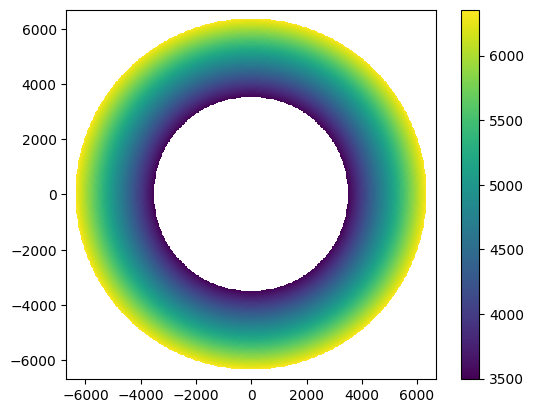

In [12]:
bvals = frb[("index", "r")]
bvals[~mask] = np.nan
plt.imshow(bvals, origin='lower', extent=frb.bounds)
plt.colorbar()

hmm, looks like there's an offset still? maybe in how the x-y points are discretized.

yt : [INFO     ] 2024-02-22 12:25:34,742 Making a fixed resolution buffer of (('index', 'theta')) 500 by 500


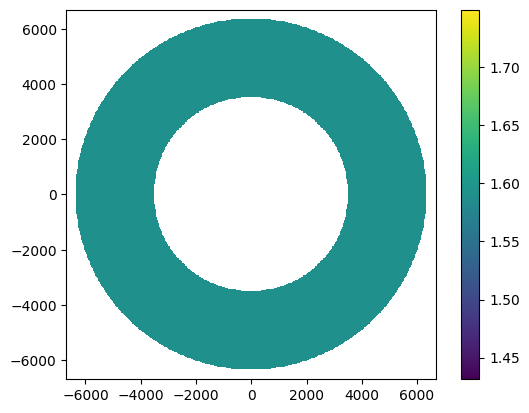

In [13]:
bvals = frb[("index", "theta")]
bvals[~mask] = np.nan
plt.imshow(bvals, origin='lower', extent=frb.bounds)
plt.colorbar()

yt : [INFO     ] 2024-02-22 12:25:34,869 Making a fixed resolution buffer of (('index', 'phi')) 500 by 500


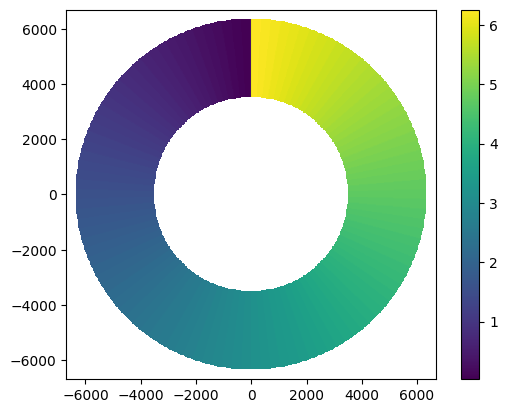

In [14]:
bvals = frb[("index", "phi")]
bvals[~mask] = np.nan
plt.imshow(bvals, origin='lower', extent=frb.bounds)
plt.colorbar()

yt : [INFO     ] 2024-02-22 12:25:34,995 Making a fixed resolution buffer of (('index', 'theta')) 500 by 500


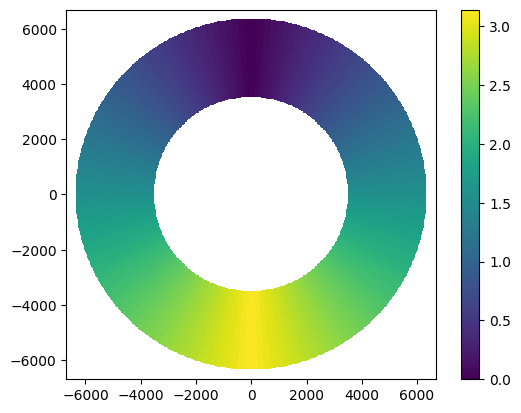

In [15]:
normal = np.array([1.0, 0.0, 0.0])
plane_center = np.array([0.0, 0.0, 0.0])
slc = ds.cutting_mixed(normal, plane_center, north_vector=np.array([0.,0.,1.]))
frb = slc.to_frb(6370*2.1, (500,500))
bvals = frb[("index", "theta")]
mask = frb.get_mask(("index", "theta"))
bvals[~mask] = np.nan
plt.imshow(bvals, origin='lower', extent=frb.bounds)
plt.clim(0, np.pi)
plt.colorbar()